# **Linear Regression : Educational Academy**

A popular educational academy has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**Column Profiling**:

- Serial No. (Unique row ID)

- GRE Scores (out of 340)

- TOEFL Scores (out of 120)

- University Rating (out of 5)

- Statement of Purpose and Letter of Recommendation Strength (out of 5)

- Undergraduate GPA (out of 10)

- Research Experience (either 0 or 1)

- Chance of Admit (ranging from 0 to 1)

## **Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/TEJA/Downloads/data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.duplicated().sum()

0

No missing values and duplicates present in the dataset

Dropping the unique identifier column `Serial No.`

In [10]:
df.drop(columns="Serial No.", axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## **Exploratory Data Analysis**


### Univariate Analysis

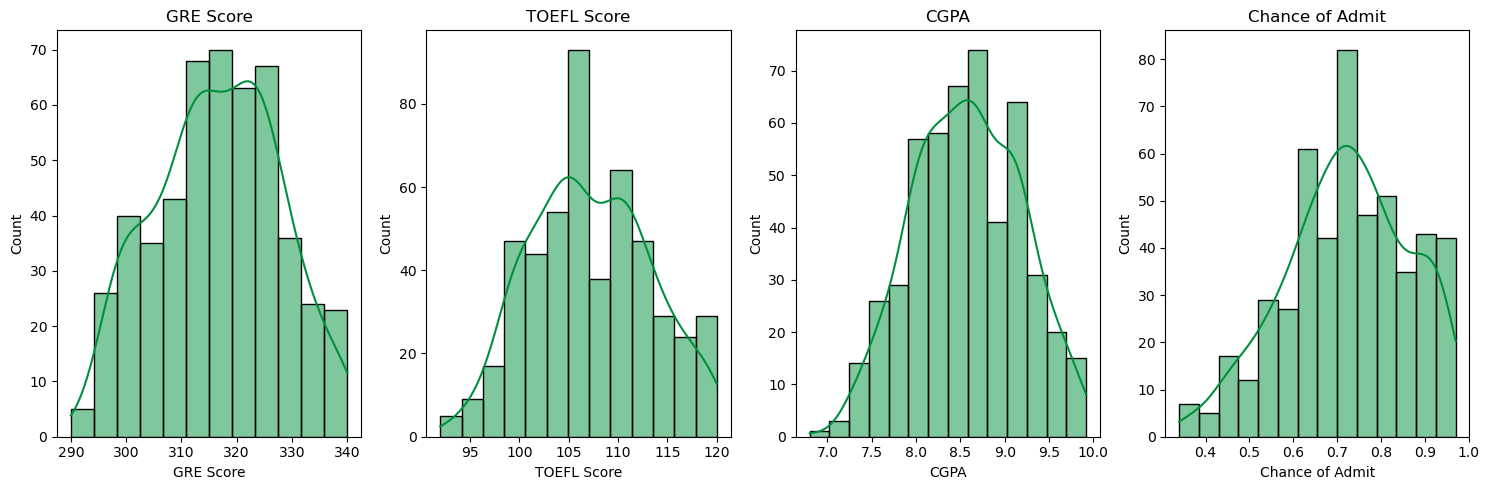

In [11]:
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

fig, axs = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5))

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=axs[i], kde=True, color='#00903d')
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

Observations :

- From the above visualization, numerical variables appear to follow Normal Distribution
- Most of the students have a GRE Score in the range of 310 - 328
- Most of the students have a TOEFL Score in the range of 105 - 108
- Most of the students have a CGPA in the range 8.5 - 8.75
- Majority of the students have a 75% chance of getting admitted into an IVY league college

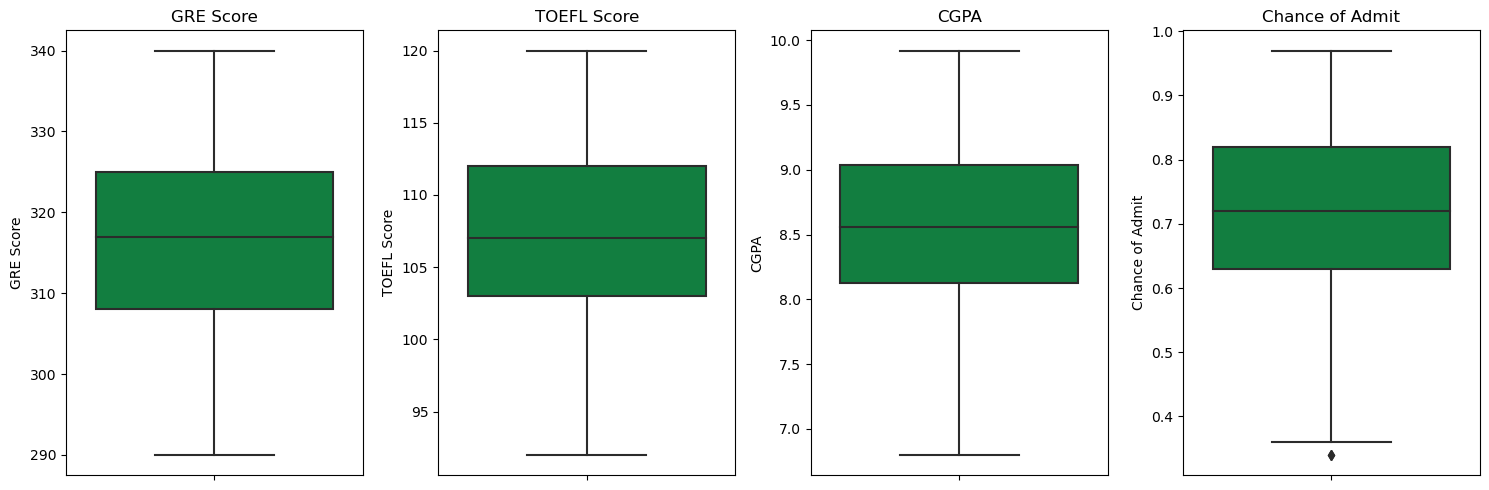

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axs[i], color='#00903d')
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

Observations :

- There are no outliers for GRE Score, TOEFL Score and CGPA
- There is one outlier in case of Chance of Admit
- The Median GRE Score is around 317, The Median TOEFL Score is 107, The Median CGPA is 8.56 and the Median probability of admission is 72%

In [13]:
cat_columns = ['University Rating', 'SOP', 'LOR', 'Research']

for col in cat_columns:
    unique_values = df[col].unique()
    print(f"Unique values for {col} : {unique_values}")

Unique values for University Rating : [4 3 2 5 1]
Unique values for SOP : [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
Unique values for LOR : [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
Unique values for Research : [1 0]


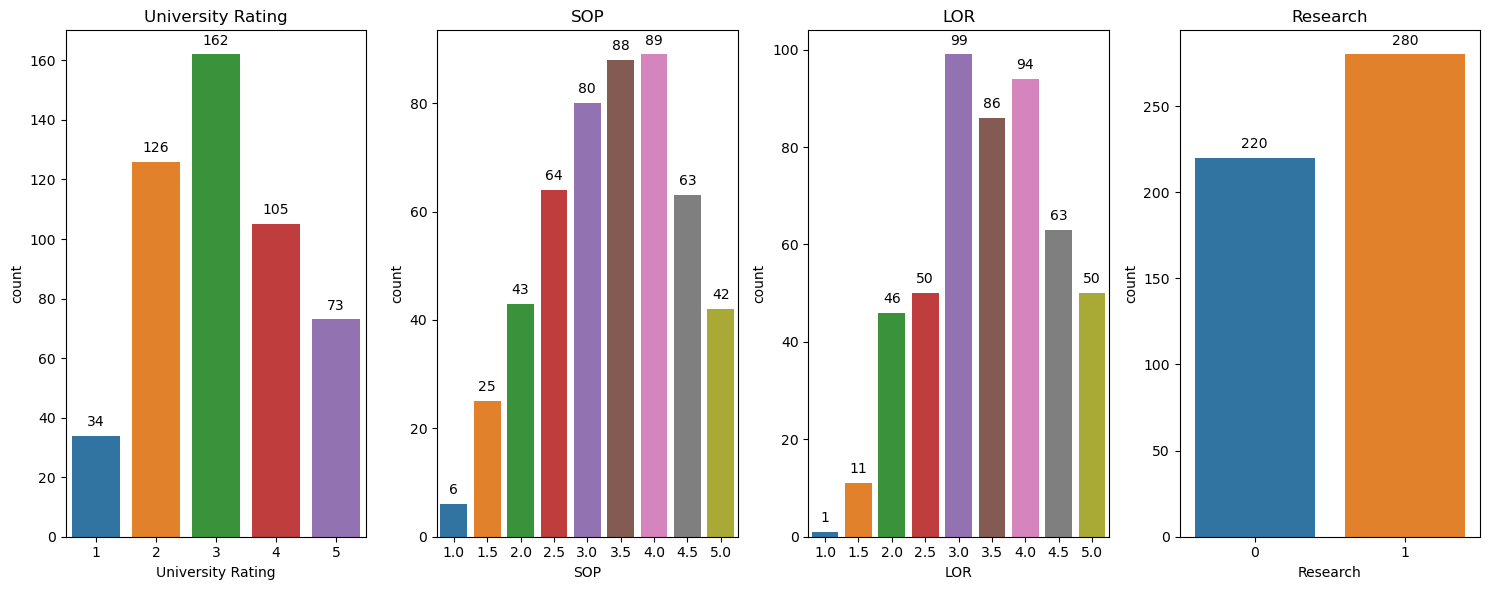

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(15, 6))

for i, col in enumerate(cat_columns):
    ax = sns.countplot(x=df[col], ax=axs[i])
    ax.set_title(col)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
plt.tight_layout()
plt.show()

### Bivariate Analysis

Correlation Heatmap

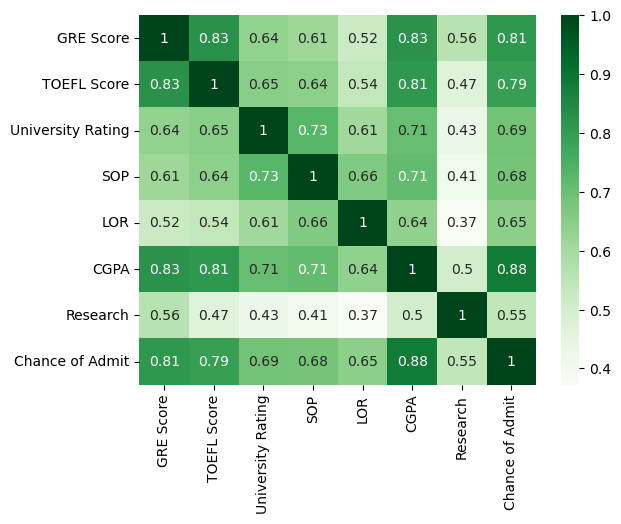

In [15]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap = 'Greens')
plt.show()

Observations :

- `TOEFL Score` and `GRE Score` have a High Correlation
- `CGPA` and `GRE Score` have a High Correlation
- `CGPA` and `TOEFL Score` have a High Correlation
- `Chance of Admit` and `CGPA` are Highly correlated
- `Chance of Admit` and `GRE Score` are Highly correlated
- `Chance of Admit` and `TOEFL Score` are Highly correlated

Chance of Admit vs CGPA, TOEFL Score, GRE Score

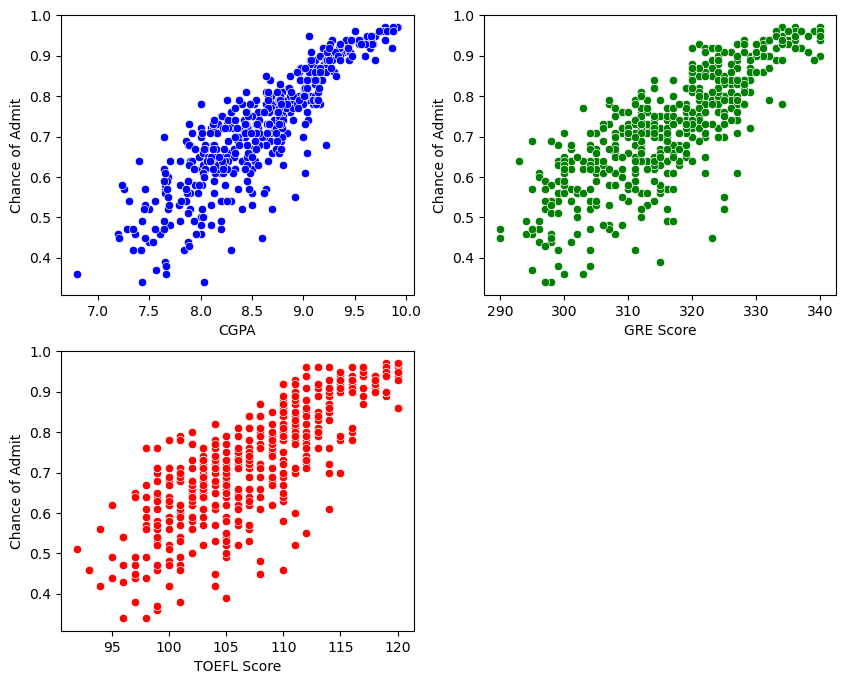

In [16]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='CGPA', y='Chance of Admit', color='blue')
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='GRE Score', y='Chance of Admit', color = 'green')
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='TOEFL Score', y='Chance of Admit',color ='red')
plt.show()

Observations :

- As CGPA, GRE Score, TOEFL Score increases, the chance of getting an admission also increases

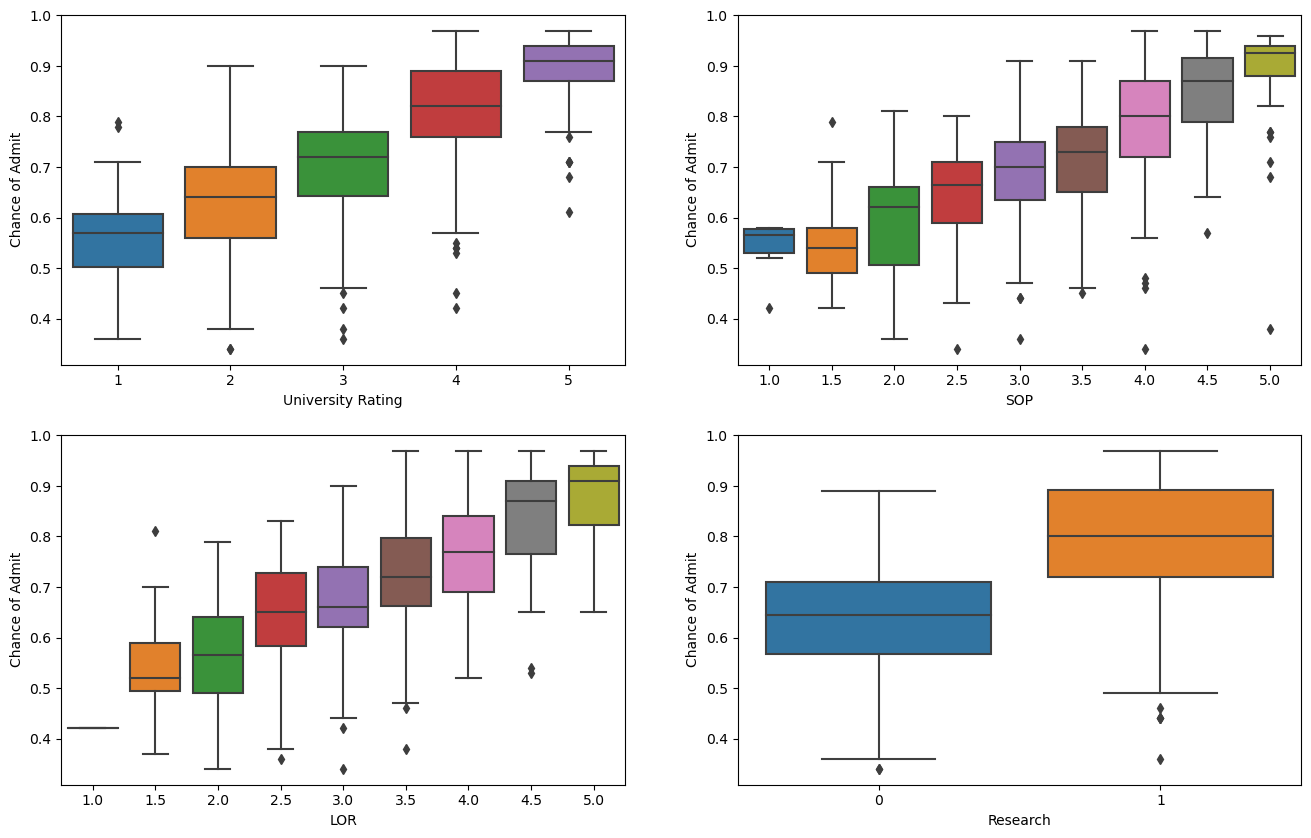

In [17]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_columns[index], y=df['Chance of Admit'], data=df, ax=axs[row,col])
        index += 1

Observations :

- The plots clearly illustrates that there is a positive correlation between the rating and the Chance of Admit, implying that as the rating increases, so does the likelihood of admission.
- It is evident from the data that students with research experience have a higher probability of admission 
- It is also evident that as the strength of both SOP and LOR increses, the probability of getting admission increases

### Multivariate Analysis

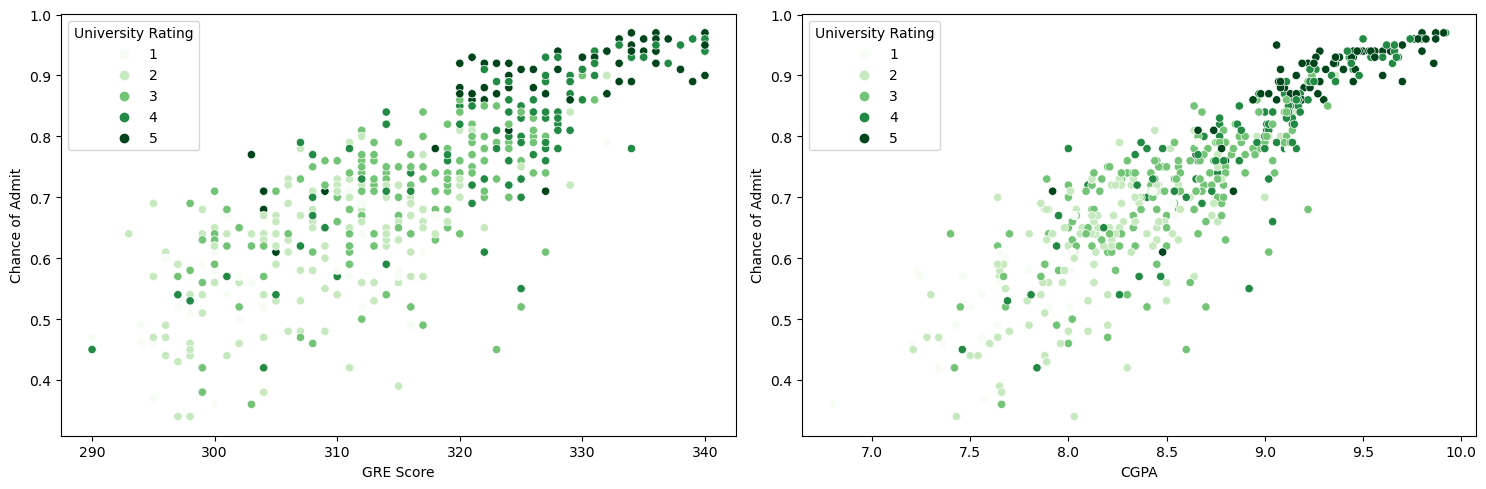

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = 'GRE Score', y = 'Chance of Admit', hue = 'University Rating', palette='Greens')
plt.subplot(1,2,2)
sns.scatterplot(data = df, x = 'CGPA', y = 'Chance of Admit', hue = 'University Rating', palette='Greens')
plt.tight_layout()
plt.show()

Observations :

- Higher the CGPA, Higher is the Chance of geting an admission in a Top Rated University
- Higher the GRE Score, Higher is the Chance of geting an admission in a Top Rated University. The same is the case with TOEFL Score


## **Model Building**

Preparing data for model building

In [47]:
# importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression

In [19]:
X = df.drop(columns=["Chance of Admit"]) # independent variables
y = df["Chance of Admit"] # dependent variable

Standardizing the data

In [24]:
s = StandardScaler()
X = s.fit_transform(X)

Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [49]:
print("Shape of X_train :", X_train.shape, ";", "Shape of y_train :", y_train.shape)
print("Shape of X_test  :", X_test.shape, ";", "Shape of y_test  :", y_test.shape)

Shape of X_train : (350, 7) ; Shape of y_train : (350,)
Shape of X_test  : (150, 7) ; Shape of y_test  : (150,)


Training the model

In [50]:
LinearRegression = LinearRegression()    # training LinearRegression model 
LinearRegression.fit(X_train,y_train)

LinearRegression()

R2-score on train data :

In [53]:
r2_score(y_train,LinearRegression.predict(X_train))

0.8209843725364347

R2-score on test data :

In [54]:
r2_score(y_test,LinearRegression.predict(X_test))

0.8157672116057978

Coefficients of all the features with intercept

In [58]:
mc = pd.DataFrame(LinearRegression.coef_.reshape(1,-1),columns=df.columns[:-1])
mc["Intercept"] = LinearRegression.intercept_
model_coeffs = mc
model_coeffs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.018657,0.023176,0.011565,-0.000999,0.012497,0.064671,0.013968,0.724978


In [61]:
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

In [63]:
y_pred = LinearRegression.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("R2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.0041259342367078004
RMSE: 0.06423343550447695
MAE : 0.04397544240339199
R2_score: 0.8157672116057978
Adjusted R2 score : 0.8131460133969372


### **Assumptions Test**

- No multicollinearity

- The mean of residual is nearly zero.

- Linearity of Variables

- Test for homoscedasticity

- Normality of residual

#### Checking for Multicollinearity using VIF Scores

In [89]:
vifs = []

for i in range(X_train.shape[1]):
    
    vifs.append(round(variance_inflation_factor(exog = X_train,
                                   exog_idx=i),2))
vifs

[4.49, 4.15, 2.99, 2.96, 2.03, 4.63, 1.53]

In [91]:
X_ind = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]

df_vif = pd.DataFrame(list(zip(X_ind, vifs)), columns=['Feature', 'VIF_Score'])

df_vif

,Feature,VIF_Score
0,GRE Score,4.49
1,TOEFL Score,4.15
2,University Rating,2.99
3,SOP,2.96
4,LOR,2.03
5,CGPA,4.63
6,Research,1.53


Observation :
- The VIF scores are all under 5, indicating that there doesn't appear to be a high degree of multicollinearity.

#### Residual analysis

In [92]:
y_predicted = LinearRegression.predict(X_train)
y_predicted.shape

(350,)

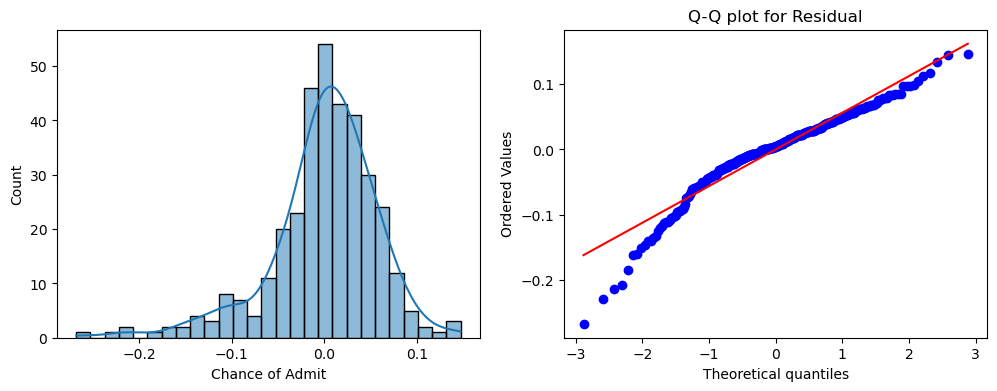

In [101]:
residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.subplot(1,2,2)
stats.probplot(residuals, plot = plt)
plt.title('Q-Q plot for Residual')
plt.show()

Observations :

- The histogram of residuals seems to have a roughly bell-shaped distribution, which suggests that the residuals may be normally distributed. This is a good sign.
- The Q-Q plot, which is used to visually check the normality of the residuals, shows that most of the points lie on or around the reference line. This again suggests that the residuals are likely normally distributed. 

#### Check for Linearity

c:\Users\TEJA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\TEJA\AppData\Local\Temp\ipykernel_976\2765639158.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


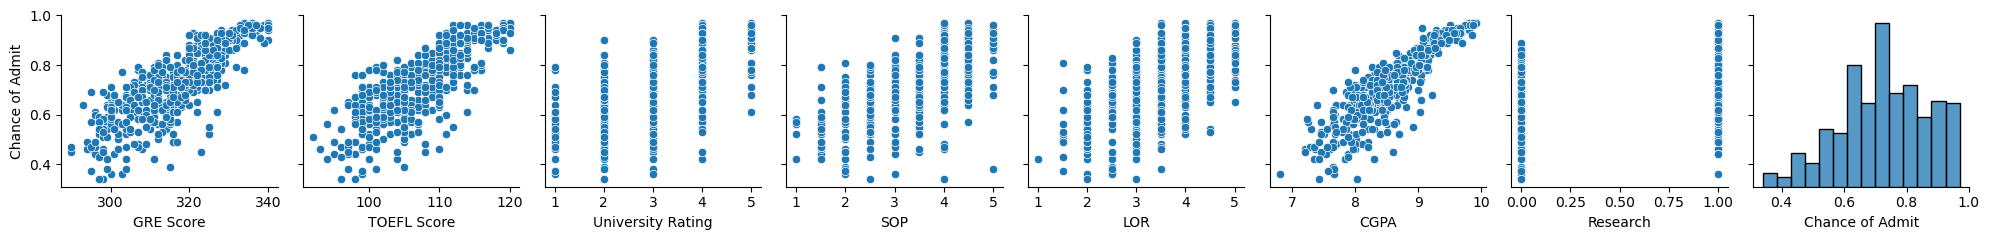

In [117]:
sns.pairplot(df, y_vars = ["Chance of Admit"])
plt.tight_layout()
plt.show()

#### Check for Homoscedasticity

In [119]:
stat, p = stats.levene(y_predicted, residuals)
print(f"Levene's test statistic value is {stat} and p value is {p}")

Levene's test statistic value is 197.89001281123672 and p value is 9.424635093021816e-40


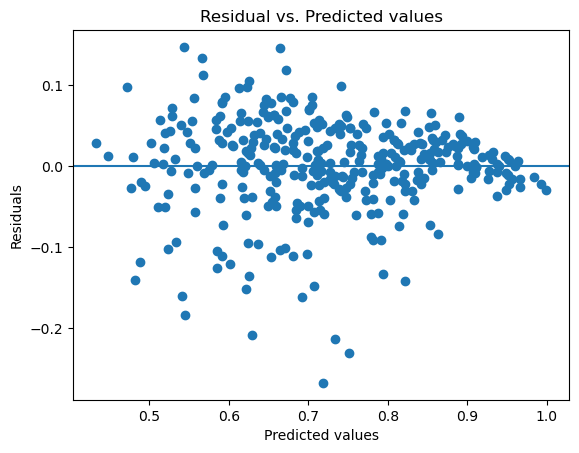

In [118]:
plt.scatter(y_predicted, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual vs. Predicted values')
plt.axhline(y=0)
plt.show()

Observations :

- The Levene's test indicates strong evidence against the null hypothesis, so you reject the null hypothesis which means that your data does not have equal variance across groups
- From the scatter plot of residuals versus predicted values, it appears that the residuals are randomly dispersed around the horizontal axis. This is a good sign, as it suggests that the assumption of homoscedasticity (constant variance of the errors) holds for the regression model.

## **Models using Ridge and Lasso Regression**

#### Ridge Regression

In [121]:
from sklearn.linear_model import Ridge  # L2 regualrization

In [122]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X_train,y_train)
trainR2 = RidgeModel.score(X_train,y_train)
testR2 = RidgeModel.score(X_test,y_test)

In [130]:
print("R2-Score on train data :", trainR2)
print("R2-Score on test data :", testR2)

R2-Score on train data : 0.820984317263507
R2-Score on test data : 0.815738928473373


Coefficients of all the features with intercept for Ridge regression

In [132]:
RidgeModel_coefs = pd.DataFrame(RidgeModel.coef_.reshape(1,-1),columns=df.columns[:-1])
RidgeModel_coefs["Intercept"] = RidgeModel.intercept_
RidgeModel_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.018682,0.023184,0.011568,-0.000979,0.012501,0.064603,0.01397,0.724979


In [135]:
# Comparing th coefficients of the previous model with the Ridge Model
model_coeffs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.018657,0.023176,0.011565,-0.000999,0.012497,0.064671,0.013968,0.724978


We can observe that the coefficients of both the models are almost same

In [136]:
y_pred_ridge = RidgeModel.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred_ridge)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_ridge))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred_ridge) ) # MAE
print("r2_score:",r2_score(y_test,y_pred_ridge)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred_ridge),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.004126567643743595
RMSE: 0.06423836582404314
MAE : 0.04397892215137693
r2_score: 0.815738928473373
Adjusted R2 score : 0.8131173278622219


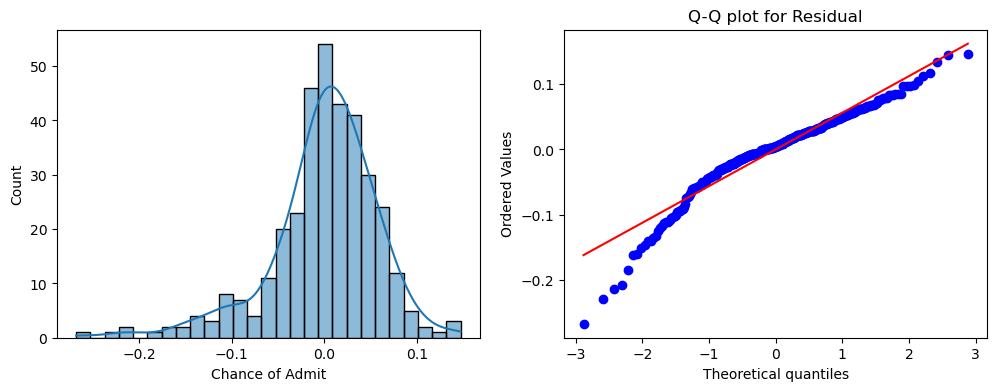

In [142]:
# Residual Plots for Ridge Regression

y_predicted_ridge = RidgeModel.predict(X_train)

residuals_ridge = (y_train - y_predicted_ridge)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals_ridge, kde=True)
plt.subplot(1,2,2)
stats.probplot(residuals_ridge, plot = plt)
plt.title('Q-Q plot for Residual')
plt.show()

### Lasso Regression

In [143]:
from sklearn.linear_model import Lasso  # L1 regualrization

In [144]:
LassoModel = Lasso(alpha=0.001)
LassoModel.fit(X_train , y_train)
trainL2 = LassoModel.score(X_train,y_train)
testL2 = LassoModel.score(X_test,y_test)

In [145]:
print("R2-Score on train data :", trainL2)
print("R2-Score on test data :", testL2)

R2-Score on train data : 0.8208794775998736
R2-Score on test data : 0.8154096820268255


Coefficients of all the features with intercept for Lasso regression

In [146]:
Lasso_Model_coefs = pd.DataFrame(LassoModel.coef_.reshape(1,-1),columns=df.columns[:-1])
Lasso_Model_coefs["Intercept"] = LassoModel.intercept_
Lasso_Model_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.018671,0.02277,0.010909,0.0,0.011752,0.064483,0.013401,0.724966


In [147]:
# Comparing the coefficients of the previous models with the Lasso Model
model_coeffs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.018657,0.023176,0.011565,-0.000999,0.012497,0.064671,0.013968,0.724978


In [148]:
RidgeModel_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.018682,0.023184,0.011568,-0.000979,0.012501,0.064603,0.01397,0.724979


We can observe that in all the three models, coefficients are almost same

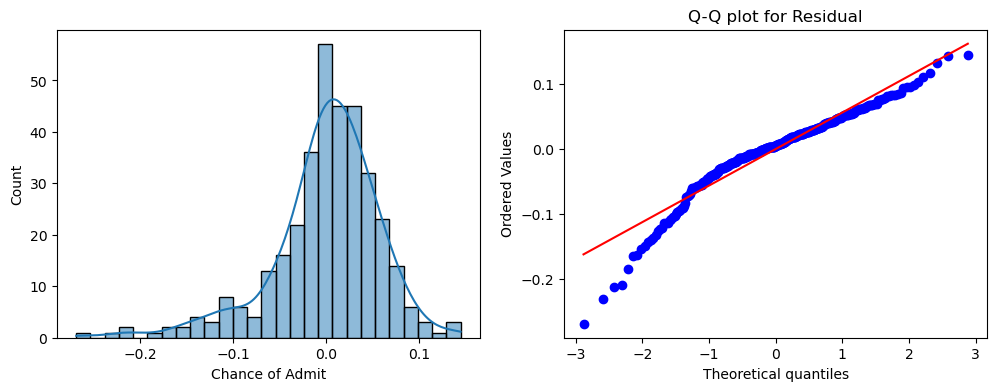

In [150]:
y_predicted_lasso = LassoModel.predict(X_train)

residuals_lasso = (y_train - y_predicted_lasso)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals_lasso, kde=True)
plt.subplot(1,2,2)
stats.probplot(residuals_lasso, plot = plt)
plt.title('Q-Q plot for Residual')
plt.show()

In [152]:
y_pred_lasso = LassoModel.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred_lasso)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lasso))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred_lasso) ) # MAE
print("r2_score:",r2_score(y_test,y_pred_lasso)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred_lasso),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.004133941191079901
RMSE: 0.06429573229289719
MAE : 0.043918080536315664
r2_score: 0.8154096820268255
Adjusted R2 score : 0.812783397015012


In [158]:
metrics_linear = [mean_squared_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred)), 
                  mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred),
                  AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])]
metrics_ridge = [mean_squared_error(y_test,y_pred_ridge), np.sqrt(mean_squared_error(y_test,y_pred_ridge)),
                 mean_absolute_error(y_test,y_pred_ridge), r2_score(y_test,y_pred_ridge),
                 AdjustedR2score(r2_score(y_test,y_pred_ridge),len(X),X.shape[1])]
metrics_lasso = [mean_squared_error(y_test,y_pred_lasso), np.sqrt(mean_squared_error(y_test,y_pred_lasso)),
                 mean_absolute_error(y_test,y_pred_lasso), r2_score(y_test,y_pred_lasso),
                 AdjustedR2score(r2_score(y_test,y_pred_lasso),len(X),X.shape[1])]

In [164]:
metric_df = pd.DataFrame([metrics_linear, metrics_ridge, metrics_lasso], 
                  columns=['MSE', 'RMSE', 'MAE', 'R2_score', 'Adjusted R2 score'],
                  index=['Linear Regression', 'Ridge Regression', 'Lasso Regression'])
metric_df

,MSE,RMSE,MAE,R2_score,Adjusted R2 score
Linear Regression,0.004126,0.064233,0.043975,0.815767,0.813146
Ridge Regression,0.004127,0.064238,0.043979,0.815739,0.813117
Lasso Regression,0.004134,0.064296,0.043918,0.815410,0.812783


Observations from all the three Models:

- Looking at the metrics for the three models, we can see that they all perform quite similarly on the test data. The Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R2 score, and Adjusted R2 score are all very close for the Linear Regression, Ridge Regression, and Lasso Regression models. 

- All three models : Linear Regression, Ridge Regression, and Lasso Regression , perform similarly on this dataset. This could be due to the fact that the dataset doesn't have features that are highly correlated with each other.

In [187]:
combined_coeffs_df = pd.concat([model_coeffs, RidgeModel_coefs, Lasso_Model_coefs], ignore_index=True)
combined_coeffs_df.index = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
combined_coeffs_df.reset_index()

,index,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,Linear Regression,0.018657,0.023176,0.011565,-0.000999,0.012497,0.064671,0.013968,0.724978
1,Ridge Regression,0.018682,0.023184,0.011568,-0.000979,0.012501,0.064603,0.013970,0.724979
2,Lasso Regression,0.018671,0.022770,0.010909,0.000000,0.011752,0.064483,0.013401,0.724966


In [199]:
model_summary = combined_coeffs_df.merge(metric_df, left_index=True, right_index=True, how='outer')
model_summary.reset_index()
model_summary

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept,MSE,RMSE,MAE,R2_score,Adjusted R2 score
Linear Regression,0.018657,0.023176,0.011565,-0.000999,0.012497,0.064671,0.013968,0.724978,0.004126,0.064233,0.043975,0.815767,0.813146
Ridge Regression,0.018682,0.023184,0.011568,-0.000979,0.012501,0.064603,0.013970,0.724979,0.004127,0.064238,0.043979,0.815739,0.813117
Lasso Regression,0.018671,0.022770,0.010909,0.000000,0.011752,0.064483,0.013401,0.724966,0.004134,0.064296,0.043918,0.815410,0.812783


## **Conclusions**

- A large number of students have achieved a GRE Score between 310 and 328.

- The TOEFL Score for the majority of students falls within the 105 to 108 range.

- The CGPA for most students lies between 8.5 and 8.75.

- A significant number of students have a 75% likelihood of being accepted into an Ivy League college.

- There are no outliers for GRE Score, TOEFL Score, and CGPA.

- There is a single extreme value when considering the Chance of Admit.

- The Median for GRE Score is approximately 317, for TOEFL Score it's 107, for CGPA it's 8.56, and for the probability of admission, 
it is 72%.

- `TOEFL Score` and `GRE Score` have a High Correlation

- `CGPA` and `GRE Score` have a High Correlation

- `CGPA` and `TOEFL Score` have a High Correlation

- `Chance of Admit` and `CGPA` are Highly correlated

- `Chance of Admit` and `GRE Score` are Highly correlated

- `Chance of Admit` and `TOEFL Score` are Highly correlated

- As the CGPA, GRE Score, and TOEFL Score increase, so does the likelihood of admission.

- The graphs clearly show a positive relationship between the rating and the Chance of Admit, suggesting that as the rating improves, the probability of admission also increases.

- The data clearly shows that students with research experience have a better chance of admission.

- It is also evident that as the strength of both SOP and LOR increases, the probability of getting admission increases

- Higher the GRE Score and CGPA, Higher is the Chance of geting an admission in a Top Rated University. The same is the case with TOEFL Score

#### Insights from Regression Analysis

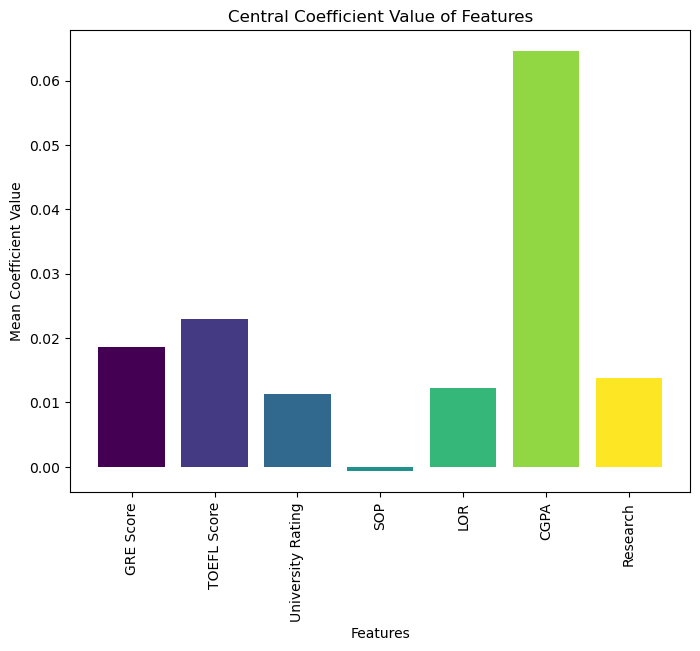

In [229]:
mean_coeffs = combined_coeffs_df.loc[:, :'Research'].mean()
colors = plt.cm.viridis(np.linspace(0, 1, len(mean_coeffs)))
plt.figure(figsize=(8, 6))
plt.bar(mean_coeffs.index, mean_coeffs.values, color=colors)
plt.title('Central Coefficient Value of Features')
plt.ylabel('Mean Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=90)  
plt.show()

- From the analysis, including it is evident that the **CGPA** is the most significant predictor for admission chances.

- Other crucial predictors include the **GRE and TOEFL scores**.

- After the initial Regression Model, we checked for multicollinearity. All the VIF scores were below 5, indicating no severe multicollinearity.

- The residuals are not perfectly normally distributed, and the residual plot shows some degree of heteroscedasticity.

- The models, Ridge and Lasso, yield results very similar to the Linear Regression Model.

## **Recommendations**

1. **Focus on High Scores**: GRE, TOEFL, and CGPA scores are all highly correlated with the chance of admission. Therefore, students with high scores in these areas are more likely to be admitted. 

2. **Emphasize on Research Experience**: Students with research experience have a higher probability of admission. Therefore, encouraging students to gain research experience could increase their chances of admission.

3. **Improve SOP and LOR**: The strength of the Statement of Purpose (SOP) and Letters of Recommendation (LOR) are positively correlated with the chance of admission. Therefore, helping students to improve these aspects of their application could increase their chances of admission.

4. **Correlation between Scores**: There is a high correlation between TOEFL Score and GRE Score, CGPA and GRE Score, and CGPA and TOEFL Score. This suggests that students who perform well in one area are likely to perform well in others.

5. **Correlation with Admission Chances**: The chance of admission is highly correlated with CGPA, GRE Score, and TOEFL Score. This indicates that these factors are key predictors of a student's likelihood of admission.

6. **Admission to Top-Rated Universities**: Higher CGPA and GRE scores increase the chance of admission in a top-rated university. This suggests that these scores are particularly important for students aiming for top institutions.

---